# Importing of Libraries

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [295]:
df = pd.read_csv("Netflix.csv")

In [296]:
df.head()

,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,29-03-2023 12:00,00:24:06,NaN,The Night Agent: Staffel 1: Wahlwiederholung (...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:25:35,00:25:35,DE (Germany)
1,29-03-2023 11:45,00:14:44,NaN,The Night Agent: Staffel 1: Der Anruf (Folge 1),NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:51:50,00:51:50,DE (Germany)
2,29-03-2023 10:40,00:37:05,NaN,The Night Agent: Staffel 1: Der Anruf (Folge 1),NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:37:06,Not latest view,DE (Germany)
3,21-03-2023 12:23,00:00:01,NaN,Ginny & Georgia: Staffel 2: Ich bin nicht Cind...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,01:04:33,01:04:33,DE (Germany)
4,21-03-2023 12:22,00:00:08,NaN,Ginny & Georgia: Staffel 2: Horcht! Die Dunkel...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,01:00:29,01:00:29,DE (Germany)


In [297]:
df.count()

Start Time                 5390
Duration                   5390
Attributes                  513
Title                      5390
Supplemental Video Type     114
Device Type                5390
Bookmark                   5390
Latest Bookmark            5390
Country                    5390
dtype: int64

# How many contries are in the data

In [298]:
unique_countries = df.Country.unique()
print(unique_countries)
print(type(unique_countries))

['DE (Germany)' 'GR (Greece)' 'IT (Italy)' 'IE (Ireland)']
<class 'numpy.ndarray'>


In [299]:
for i in unique_countries:
    print(i)

DE (Germany)
GR (Greece)
IT (Italy)
IE (Ireland)


In [300]:
#count_germany = df["Country"].value_counts()['DE (Germany)']

In [301]:
x = unique_countries

In [302]:
y=[]
for i in unique_countries:
    y.append(df["Country"].value_counts()[i])
print(y)

[5354, 1, 6, 29]


Rectangle(xy=(-0.4, 0), width=0.8, height=5354, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=1, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=6, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=29, angle=0)


Text(0.5, 1.0, 'distribution of Countries')

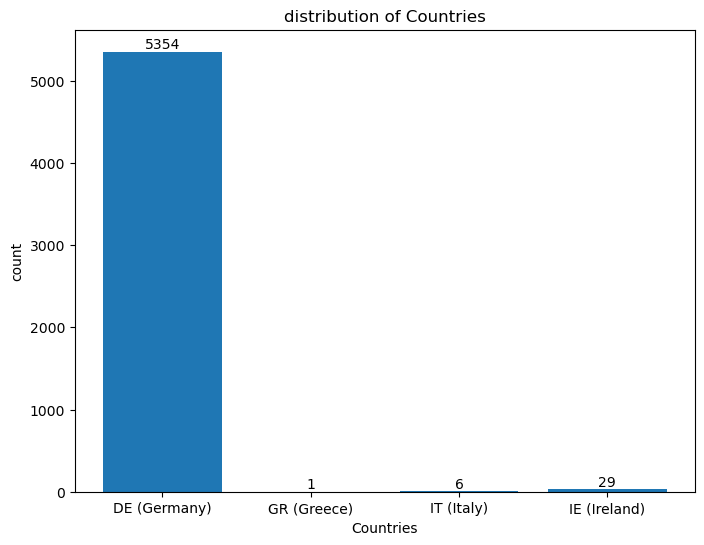

In [303]:
# Creating bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(x, y)

# Adding counts on top of bars
for bar in bars:
    height = bar.get_height()
    print(bar)
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), 
             ha='center', va='bottom', color='black')
plt.xlabel('Countries')
plt.ylabel('count')
plt.title('distribution of Countries')

# Majority of Data comes from Germany

In [304]:
# What is the average watch time (duration) of this user?

In [305]:
def convert_2_datetime(date_string):
    from datetime import datetime
    
    # Given string
    #date_string = "29-03-2023 12:00:13"
    
    # Convert string to datetime object
    date_time_obj = datetime.strptime(date_string, '%d-%m-%Y %H:%M')
    
    return date_time_obj

In [306]:
start_time = df["Start Time"]

In [307]:
#a = convert_2_datetime(start_time[0])

In [308]:
st_date=[]
st_time=[]
st_year = []
for i in start_time:
    st_date.append(convert_2_datetime(i).date())
    st_time.append(convert_2_datetime(i).time())
    st_year.append(convert_2_datetime(i).date().year)
df["Start Time_date"] = st_date
df["Start Time_time"] = st_time
df["Start Time_year"] = st_year

In [309]:
df.head()

,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Start Time_date,Start Time_time,Start Time_year
0,29-03-2023 12:00,00:24:06,NaN,The Night Agent: Staffel 1: Wahlwiederholung (...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:25:35,00:25:35,DE (Germany),2023-03-29,12:00:00,2023
1,29-03-2023 11:45,00:14:44,NaN,The Night Agent: Staffel 1: Der Anruf (Folge 1),NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:51:50,00:51:50,DE (Germany),2023-03-29,11:45:00,2023
2,29-03-2023 10:40,00:37:05,NaN,The Night Agent: Staffel 1: Der Anruf (Folge 1),NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:37:06,Not latest view,DE (Germany),2023-03-29,10:40:00,2023
3,21-03-2023 12:23,00:00:01,NaN,Ginny & Georgia: Staffel 2: Ich bin nicht Cind...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,01:04:33,01:04:33,DE (Germany),2023-03-21,12:23:00,2023
4,21-03-2023 12:22,00:00:08,NaN,Ginny & Georgia: Staffel 2: Horcht! Die Dunkel...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,01:00:29,01:00:29,DE (Germany),2023-03-21,12:22:00,2023


In [310]:
df.loc[0,"Title"]

'The Night Agent: Staffel 1: Wahlwiederholung (Folge 2)'

In [311]:
df.loc[df['Duration']=='00:24:06',"Title"]

0       The Night Agent: Staffel 1: Wahlwiederholung (...
1106    Persona 5: The Animation: Staffel 1: Operation...
1107    Persona 5: The Animation: Staffel 1: Beende es...
1111    Persona 5: The Animation: Staffel 1: Unser näc...
2971              Tokyo Ghoul: Staffel 1: Ghul (Folge 12)
3231     Big Mouth: Staffel 1: Everybody Bleeds (Folge 2)
Name: Title, dtype: object

In [312]:
highest_count_value = df['Start Time_date'].value_counts().idxmax()
highest_count = df['Start Time_date'].value_counts().max()

print(f"Value with highest count: {highest_count_value}")
print(f"Highest count: {highest_count}")

Value with highest count: 2018-09-03
Highest count: 37


# average duration in Total

In [313]:
def convert_2_time(date_string):
    from datetime import datetime
    
    # Given string
    #date_string = "29-03-2023 12:00:13"
    
    # Convert string to datetime object
    date_time_obj = datetime.strptime(date_string, '%H:%M:%S')
    
    date_time = date_time_obj.time()
    
    return date_time

In [314]:
duration = df['Duration']

In [315]:
duration

0       00:24:06
1       00:14:44
2       00:37:05
3       00:00:01
4       00:00:08
          ...   
5385    00:03:16
5386    00:22:51
5387    00:33:21
5388    00:01:31
5389    00:08:43
Name: Duration, Length: 5390, dtype: object

In [316]:
duration_datetime = pd.Series([convert_2_time(i) for i in duration])

In [317]:
len(duration_datetime)

5390

In [318]:
df['duration_datetime'] = duration_datetime

In [319]:
df

,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Start Time_date,Start Time_time,Start Time_year,duration_datetime
0,29-03-2023 12:00,00:24:06,NaN,The Night Agent: Staffel 1: Wahlwiederholung (...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:25:35,00:25:35,DE (Germany),2023-03-29,12:00:00,2023,00:24:06
1,29-03-2023 11:45,00:14:44,NaN,The Night Agent: Staffel 1: Der Anruf (Folge 1),NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:51:50,00:51:50,DE (Germany),2023-03-29,11:45:00,2023,00:14:44
2,29-03-2023 10:40,00:37:05,NaN,The Night Agent: Staffel 1: Der Anruf (Folge 1),NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:37:06,Not latest view,DE (Germany),2023-03-29,10:40:00,2023,00:37:05
3,21-03-2023 12:23,00:00:01,NaN,Ginny & Georgia: Staffel 2: Ich bin nicht Cind...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,01:04:33,01:04:33,DE (Germany),2023-03-21,12:23:00,2023,00:00:01
4,21-03-2023 12:22,00:00:08,NaN,Ginny & Georgia: Staffel 2: Horcht! Die Dunkel...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,01:00:29,01:00:29,DE (Germany),2023-03-21,12:22:00,2023,00:00:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5385,04-06-2018 23:28,00:03:16,NaN,Tote Mädchen lügen nicht: Staffel 1: Kassette ...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:00:01,Not latest view,DE (Germany),2018-06-04,23:28:00,2018,00:03:16
5386,04-06-2018 22:54,00:22:51,NaN,Tote Mädchen lügen nicht: Staffel 2: Das erste...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:56:21,Not latest view,DE (Germany),2018-06-04,22:54:00,2018,00:22:51
5387,04-06-2018 17:40,00:33:21,NaN,Tote Mädchen lügen nicht: Staffel 2: Das erste...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:33:34,Not latest view,DE (Germany),2018-06-04,17:40:00,2018,00:33:21
5388,04-06-2018 17:39,00:01:31,NaN,Tote Mädchen lügen nicht: Staffel 1: Kassette ...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:01:31,Not latest view,DE (Germany),2018-06-04,17:39:00,2018,00:01:31


In [320]:
total_seconds_series = duration_datetime.apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

In [321]:
# Calculate the average total seconds
average_total_seconds = total_seconds_series.mean()


# Calculate the average total seconds
average_total_seconds = total_seconds_series.mean()


# Convert average total seconds back to a time object
average_time = pd.to_datetime(average_total_seconds, unit="s").time()

print("Average time:", average_time)
print(f"Average time of the user is {average_time.minute} mins")

Average time: 00:20:45.053988
Average time of the user is 20 mins


In [322]:
def convert_2_mins_duration(duration_datetime):
    total_seconds_series = duration_datetime.apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
    total_seconds = total_seconds_series.sum()
    total_minutes = total_seconds/60
    return total_minutes

In [323]:
convert_2_mins_duration(duration_datetime)

111847.35

# minutes of watch time in Germany

In [324]:
duration_germany = df.loc[df['Country']=='DE (Germany)',"Duration"]

In [325]:
duration_germany_datetime = pd.to_datetime(duration_germany)

In [326]:
duration_germany_total_seconds = duration_germany_datetime.apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second).sum()

In [327]:
total_time_minutes = duration_germany_total_seconds/60

In [328]:
print("total minutes of watch time in germany:", total_time_minutes)

total minutes of watch time in germany: 111022.3


In [329]:
title = df['Title']

In [330]:
title.unique().size

3019

In [331]:
c=df['Title'].value_counts()[title.unique()]

In [332]:
print(c)

The Night Agent: Staffel 1: Wahlwiederholung (Folge 2)                      1
The Night Agent: Staffel 1: Der Anruf (Folge 1)                             2
Ginny & Georgia: Staffel 2: Ich bin nicht Cinderella (Folge 10)             1
Ginny & Georgia: Staffel 2: Horcht! Die Dunkelheit bricht an (Folge 8)      3
Shadow and Bone – Legenden der Grisha: Staffel 2: Keine Gräber (Folge 8)    1
                                                                           ..
The First Avenger: Civil War                                                1
Batman v Superman: Dawn of Justice                                          1
Marvel's The Avengers                                                       2
The Return of the First Avenger                                             2
Jane the Virgin: Staffel 1: Kapitel vier (Folge 4)                          1
Name: Title, Length: 3019, dtype: int64


In [333]:
title = df['Title']

In [334]:
title_lst = []
for i in range(len(title)):
    first_row = df.iloc[i].tolist()
    title_lst.append(first_row)

In [335]:
movie_names_full= []
for i in range(len(title_lst)):
    movie_names_full.append(title_lst[i][3])

In [336]:
movie_names_split = []
movie_names = []
for i in range(len(movie_names_full)):
    movie_names_split.append(movie_names_full[i].split(':'))
    movie_names.append(movie_names_full[i].split(':')[0])

In [337]:
df['movie_names'] = movie_names

In [338]:
movie_names_unique = df['movie_names'].value_counts()[df['movie_names'].unique()]
print(movie_names_unique.idxmax())
print(movie_names_unique.max())

The Blacklist
333


In [339]:
df

,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Start Time_date,Start Time_time,Start Time_year,duration_datetime,movie_names
0,29-03-2023 12:00,00:24:06,NaN,The Night Agent: Staffel 1: Wahlwiederholung (...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:25:35,00:25:35,DE (Germany),2023-03-29,12:00:00,2023,00:24:06,The Night Agent
1,29-03-2023 11:45,00:14:44,NaN,The Night Agent: Staffel 1: Der Anruf (Folge 1),NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:51:50,00:51:50,DE (Germany),2023-03-29,11:45:00,2023,00:14:44,The Night Agent
2,29-03-2023 10:40,00:37:05,NaN,The Night Agent: Staffel 1: Der Anruf (Folge 1),NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:37:06,Not latest view,DE (Germany),2023-03-29,10:40:00,2023,00:37:05,The Night Agent
3,21-03-2023 12:23,00:00:01,NaN,Ginny & Georgia: Staffel 2: Ich bin nicht Cind...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,01:04:33,01:04:33,DE (Germany),2023-03-21,12:23:00,2023,00:00:01,Ginny & Georgia
4,21-03-2023 12:22,00:00:08,NaN,Ginny & Georgia: Staffel 2: Horcht! Die Dunkel...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,01:00:29,01:00:29,DE (Germany),2023-03-21,12:22:00,2023,00:00:08,Ginny & Georgia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5385,04-06-2018 23:28,00:03:16,NaN,Tote Mädchen lügen nicht: Staffel 1: Kassette ...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:00:01,Not latest view,DE (Germany),2018-06-04,23:28:00,2018,00:03:16,Tote Mädchen lügen nicht
5386,04-06-2018 22:54,00:22:51,NaN,Tote Mädchen lügen nicht: Staffel 2: Das erste...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:56:21,Not latest view,DE (Germany),2018-06-04,22:54:00,2018,00:22:51,Tote Mädchen lügen nicht
5387,04-06-2018 17:40,00:33:21,NaN,Tote Mädchen lügen nicht: Staffel 2: Das erste...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:33:34,Not latest view,DE (Germany),2018-06-04,17:40:00,2018,00:33:21,Tote Mädchen lügen nicht
5388,04-06-2018 17:39,00:01:31,NaN,Tote Mädchen lügen nicht: Staffel 1: Kassette ...,NaN,Netflix Windows App - Cadmium Windows Mobile,00:01:31,Not latest view,DE (Germany),2018-06-04,17:39:00,2018,00:01:31,Tote Mädchen lügen nicht


In [340]:
movie_names_unique.sort_values(ascending=False)

The Blacklist              333
Naruto                     307
Naruto Shippuden           227
Vikings                    222
Orange Is the New Black    188
                          ... 
Staffel 4 (Teaser)           1
Oats Studios                 1
Bakemonogatari               1
Brooklyn Nine-Nine           1
Überredung (Clip)            1
Name: movie_names, Length: 466, dtype: int64

In [360]:
blacklist_data = df.loc[df['movie_names']=='The Blacklist']
naruto_data = df.loc[df['movie_names']=='Naruto']
Naruto_Shippuden_data = df.loc[df['movie_names']=='Naruto Shippuden']
vikings_data = df.loc[df['movie_names']=='Vikings']
OITTNB_data = df.loc[df['movie_names']=='Orange Is the New Black']

In [355]:
blacklist_data

In [356]:
def convert_2_time(date_string):
    from datetime import datetime
    
    # Convert string to datetime object
    date_time_obj = datetime.strptime(date_string, '%H:%M:%S').time()
    
    return date_time_obj

In [363]:
def total_mins_duration(duration_datetime):
    total_seconds_series = duration_datetime.apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
    total_seconds = total_seconds_series.sum()
    total_minutes = total_seconds/60
    return total_minutes

In [373]:
#Finding the duration in date time object to split the date and time for the top shows
duration_datetime_blacklist = df.loc[df['movie_names']=='The Blacklist', 'duration_datetime']
duration_datetime_startdate_blacklist = df.loc[df['movie_names']=='The Blacklist','Start Time_date']

duration_datetime_Naruto = df.loc[df['movie_names']=='Naruto', 'duration_datetime']
duration_datetime_startdate_Naruto = df.loc[df['movie_names']=='Naruto','Start Time_date']

duration_datetime_Naruto_Shippuden = df.loc[df['movie_names']=='Naruto Shippuden', 'duration_datetime']
duration_datetime_startdate_Naruto_Shippuden = df.loc[df['movie_names']=='Naruto Shippuden','Start Time_date']

duration_datetime_Vikings = df.loc[df['movie_names']=='Vikings', 'duration_datetime']
duration_datetime_startdate_Vikings = df.loc[df['movie_names']=='Vikings','Start Time_date']

duration_datetime_OB = df.loc[df['movie_names']=='Orange Is the New Black', 'duration_datetime']
duration_datetime_startdate_OB = df.loc[df['movie_names']=='Orange Is the New Black','Start Time_date']

In [374]:
blacklist_duration=blacklist_data['duration_datetime']

In [383]:
blacklist_total_mins = total_mins_duration(duration_datetime_blacklist)
Naruto_total_mins = total_mins_duration(duration_datetime_Naruto)
Naruto_Shippuden_total_mins = total_mins_duration(duration_datetime_Naruto_Shippuden)
Vikings_total_mins = total_mins_duration(duration_datetime_Vikings)
OB_total_mins = total_mins_duration(duration_datetime_OB)

top_5_most_logged_in = ['The Blacklist','Naruto', 'Naruto Shippuden', 'Vikings','Orange Is the New Black']
top_5_total_time = [round(blacklist_total_mins,2), round(Naruto_total_mins,2), round(Naruto_Shippuden_total_mins,2), round(Vikings_total_mins,2), round(OB_total_mins,2) ]

Rectangle(xy=(-0.4, 0), width=0.8, height=8103.9, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=4733.38, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=3577.95, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=4393.78, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=5264.32, angle=0)


Text(0.5, 1.0, 'top_5_most_logged_in')

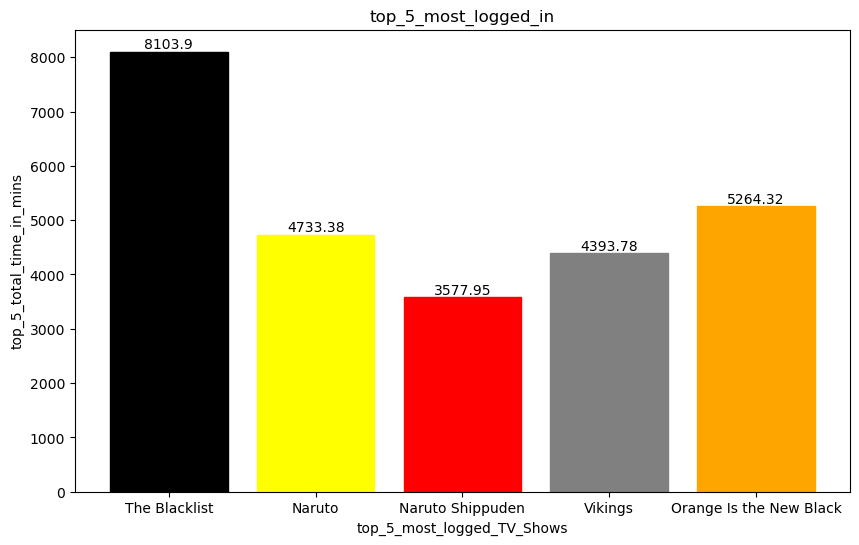

In [389]:
plt.figure(figsize=(10,6))

bars = plt.bar(top_5_most_logged_in,top_5_total_time)
bars[0].set_color('black')
bars[1].set_color('yellow')
bars[2].set_color('red')
bars[3].set_color('grey')
bars[4].set_color('orange')

# Adding counts on top of bars
for bar in bars:
    height = bar.get_height()
    print(bar)
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), 
             ha='center', va='bottom', color='black')
plt.xlabel('top_5_most_logged_TV_Shows')
plt.ylabel('top_5_total_time_in_mins')
plt.title('top_5_most_logged_in')

In [369]:
yr = df['Start Time_year'].unique()

In [246]:
year = yr.tolist()

In [255]:
year.sort()

In [258]:
year

[2018, 2019, 2020, 2021, 2022, 2023]